# 测试计算尖峰序列的信息熵 entropy 和两个序列的互信息 mutual information

选择`bin_size`（即时间窗口大小）是计算尖峰序列信息熵时的一个重要步骤，因为它直接影响到离散化尖峰计数的粒度，从而影响到概率分布的计算和最终的信息熵结果。选择合适的`bin_size`需要考虑以下因素：

### 1. 尖峰率

- **高尖峰率**：对于放电率较高的神经元，较小的`bin_size`可以避免多个尖峰落在同一个时间窗口内，从而更准确地反映尖峰的时间分布。
- **低尖峰率**：对于放电率较低的神经元，较大的`bin_size`可能更适合，因为它可以减少由于随机波动导致的概率分布估计误差。

### 2. 尖峰时间的分布特性

- **规律性强**：如果尖峰时间具有明显的周期性或规律性，`bin_size`应选择能够捕捉到这些规律性的大小。
- **随机性强**：对于随机放电模式，选择`bin_size`时需要权衡精度和计算复杂性。

### 3. 实验条件和研究目的

- **短时动态分析**：研究短时动态变化时，较小的`bin_size`可以提供更高的时间分辨率。
- **长时行为分析**：研究长时间尺度的行为时，较大的`bin_size`可能更合适，以减少数据量和计算时间。

### 4. 试错法

由于理想的`bin_size`可能依赖于具体的数据集和分析目标，实践中常用的方法是试错法：从一个基于以上考虑确定的初步`bin_size`开始，然后根据计算结果的合理性和需要解决的问题进行调整。

### 实用建议

- **数据探索**：初步分析尖峰时间序列的统计特性，如总尖峰数、平均放电率等，可以提供有关如何选择`bin_size`的初步指导。
- **文献参考**：参考相关研究领域已发表的研究工作，了解他们如何选择`bin_size`以及他们的研究目的。
- **敏感性分析**：在一定范围内变化`bin_size`，观察信息熵和互信息结果的变化，选择在结果变化不大的`bin_size`区间中的一个值。

最终，`bin_size`的选择应该平衡计算的精度和实际应用中的可行性，确保分析结果的可靠性和解释性。

In [43]:
import os
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
# from nodes.HR import HR
from nodes.HH import HH
from connect.ws_small_world import create_sw
from synapse.synapse import synbase
from utils.statistics import cal_cv, cal_synFactor, cal_kop, cal_information
from utils.utils import spikevent
from utils.utils_plot import plot_firing_raster

In [44]:
seed = 0
np.random.seed(seed)                # 给numpy设置随机种子

In [45]:
N = 100
dt = 0.01
pre = HH(N=N)
post = pre
# post = HH(N=N)

In [46]:
Num = int(N)
conn = create_sw(Num, 2, 0.5)
syn = synbase(pre, post, conn=conn, synType="electr")   # ["electr", "chem_Alpha"]

In [47]:
# 初始化神经元
for i in range(10000):
    pre()
    # post()

In [48]:
syn.w = .08

In [49]:
# 初始化网络
for i in range(10000):
    syn()

In [50]:
Tn = 100000
cal_info = cal_information(syn.t, syn.t+Tn*dt, bin_size=15)

In [51]:
time = []
mem = []
for i in range(Tn):
    # 使用泊松过程测试CV
    # pre.Iex=0 
    # pre.Iex=(np.random.rand(N)<0.1).astype(float)*100
    syn()
    cal_info(pre.flaglaunch, syn.t)
    time.append(syn.t)
    mem.append(syn.post.mem.copy())

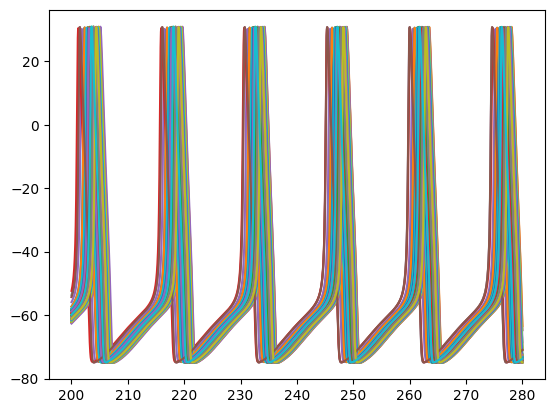

In [52]:
plt.plot(time[0:8000], mem[0:8000])
plt.show()

In [53]:
entropy, MI = cal_info.return_info()

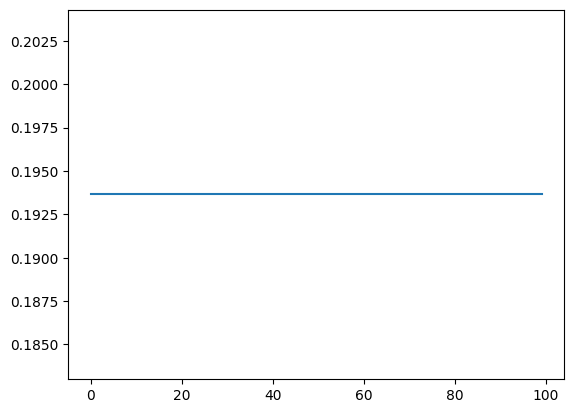

In [54]:
plt.plot(entropy)

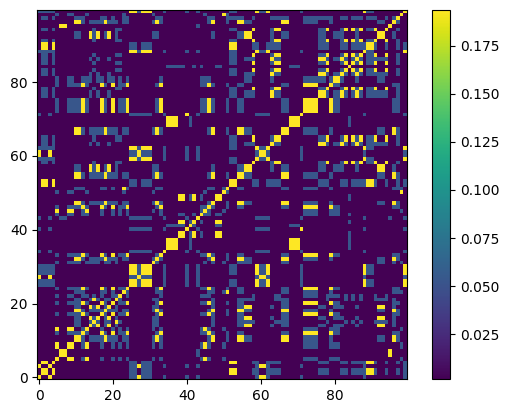

In [55]:
plt.imshow(MI, origin="lower")
plt.colorbar()

In [56]:
print(entropy)
print(MI[0,0])

[0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.19364280468101325, 0.1936428046